In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import time
from scipy.special import gamma as gamma_func
import pickle

In [3]:
import sys
sys.path.append("../code")
import model
import plotting
import parameters
import sensitivity_analysis

In [4]:
params = parameters.get_params()
m = model.Model(**params)
m.t_min = m.gamma_cutoff + 56
m.alpha_u = 0.02
m.alpha_w = 0.02

effective immune rate: [0.32  0.648 0.736 0.816 0.904 0.96 ]
total effective immune rate: 0.68032


# Calculations

In [5]:
beta_sa = sensitivity_analysis.sweep(m, 'beta', np.logspace(np.log10(0.4),np.log10(0.6),21))

In [6]:
kappa_sa = sensitivity_analysis.sweep(m, 'kappa', np.linspace(0.5,1,21))

In [7]:
sigma_sa = sensitivity_analysis.sweep(m, 'sigma', np.linspace(0.5,1,21))

In [8]:
delta_sa = sensitivity_analysis.sweep(m, 'delta', np.logspace(-0.3,0.3,21), vector=True)

In [9]:
rho_sa = sensitivity_analysis.sweep(m, 'rho', np.logspace(-0.3,0.3,21)*0.25)

In [10]:
gamma_sa = sensitivity_analysis.sweep(m, 'gamma', np.logspace(-0.3,0.3,21), vector=True)

In [11]:
gammaICU_sa = sensitivity_analysis.sweep(m, 'gamma_ICU', np.logspace(-0.3,0.3,21), vector=True)

In [12]:
Theta_sa = sensitivity_analysis.sweep(m, 'Theta', np.logspace(-0.3,0.3,21), vector=True)

In [13]:
ThetaICU_sa = sensitivity_analysis.sweep(m, 'Theta_ICU', np.logspace(-0.3,0.3,21), vector=True)

In [14]:
omegav_sa = sensitivity_analysis.sweep(m, 'omega_v', 1./np.linspace(120,360,21))

In [15]:
omegan_sa = sensitivity_analysis.sweep(m, 'omega_n', 1./np.linspace(120,360,21))

In [16]:
exp_sa = sensitivity_analysis.sweep(m, 'exp', np.logspace(-1,0,21))

In [17]:
mu_sa = sensitivity_analysis.sweep(m, 'mu', np.logspace(-0.3,0.3,21)*0.267)

In [18]:
d0_sa = sensitivity_analysis.sweep(m, 'd_0', np.linspace(-60,60,21)+8*30)

In [19]:
aRt_sa = sensitivity_analysis.sweep(m, 'a_Rt', np.logspace(-0.3,0.3,21)*4)

In [20]:
bRt_sa = sensitivity_analysis.sweep(m, 'b_Rt', np.logspace(-0.3,0.3,21)*0.7)

In [21]:
avac_sa = sensitivity_analysis.sweep(m, 'a_vac', np.logspace(-0.3,0.3,21)*6)

In [22]:
bvac_sa = sensitivity_analysis.sweep(m, 'b_vac', np.logspace(-0.3,0.3,21)*0.4)

In [23]:
tauvac1_sa = sensitivity_analysis.sweep(m, 'tau_vac1', np.linspace(14,56,21))

In [44]:
tauvac2_sa = sensitivity_analysis.sweep(m, 'tau_vac2', np.linspace(1,21,21))

In [25]:
kICUcap_sa = sensitivity_analysis.sweep(m, 'k_ICUcap', np.linspace(25,50,21))

In [26]:
epsilonK_sa = sensitivity_analysis.sweep(m, 'epsilon_k', np.logspace(0,2,21))

In [127]:
alphaU_sa = sensitivity_analysis.sweep(m, 'alpha_u', np.logspace(-0.3,0.3,21)*0.02)

In [128]:
alphaW_sa = sensitivity_analysis.sweep(m, 'alpha_w', np.logspace(-0.3,0.3,21)*0.02)

In [29]:
ubase_sa = sensitivity_analysis.sweep(m, 'u_base', np.logspace(-0.1,0.1,21), vector=True)

In [30]:
wbase_sa = sensitivity_analysis.sweep(m, 'w_base', np.logspace(-0.1,0.1,21), vector=True)

In [31]:
chiU_sa = sensitivity_analysis.sweep(m, 'chi_u', np.logspace(-0.1,0.1,21), vector=True)

In [32]:
chiW_sa = sensitivity_analysis.sweep(m, 'chi_w', np.logspace(-0.1,0.1,21), vector=True)

In [33]:
timeU_sa = sensitivity_analysis.sweep(m, 'time_u', np.linspace(1,28,21))

In [34]:
timeW_sa = sensitivity_analysis.sweep(m, 'time_w', np.linspace(1,28,21))

In [35]:
epsilonU_sa = sensitivity_analysis.sweep(m, 'epsilon_u', np.logspace(-3,-1,21))

In [36]:
epsilonW_sa = sensitivity_analysis.sweep(m, 'epsilon_u', np.logspace(-3,-1,21))

In [37]:
influx_sa = sensitivity_analysis.sweep(m, 'influx', np.logspace(-1,1,21))

In [137]:
SA = {'m':m,
      'beta':beta_sa, 'kappa':kappa_sa, 'sigma':sigma_sa, 'delta':delta_sa, 'rho':rho_sa,
      'gamma':gamma_sa, 'gammaICU':gammaICU_sa, 'Theta':Theta_sa, 'ThetaICU':ThetaICU_sa,
      'omegav':omegav_sa, 'omegan':omegan_sa,
      'exp':exp_sa, 'mu':mu_sa, 'd0':d0_sa,
      'aRt':aRt_sa, 'bRt':bRt_sa, 'avac':avac_sa, 'bvac':bvac_sa, 'tauvac1':tauvac1_sa, 'tauvac2':tauvac2_sa,
      'kICUcap':kICUcap_sa, 'epsilonK':epsilonK_sa,
      'alphaU':alphaU_sa, 'alphaW':alphaW_sa, 'ubase':ubase_sa, 'wbase':wbase_sa, 'chiU':chiU_sa, 'chiW':chiW_sa,
      'timeU':timeU_sa, 'timeW':timeW_sa, 'epsilonU':epsilonU_sa, 'epsilonW':epsilonW_sa,
      'influx':influx_sa,
      }

with open('./pickle/sensitivity_analysis_21_12_02.pickle', 'wb') as file:
    pickle.dump(SA, file)

In [5]:
with open('./pickle/sensitivity_analysis_21_12_02.pickle', 'rb') as file:
    SA = pickle.load(file)

ModuleNotFoundError: No module named 'model_agegroups'

# Plots

### Spreading

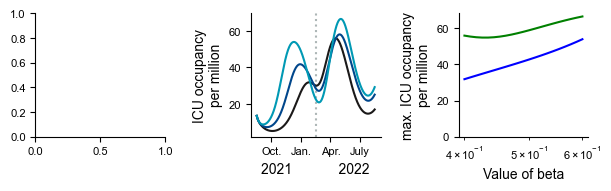

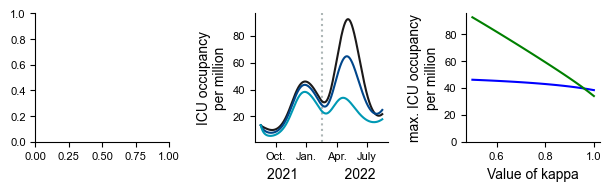

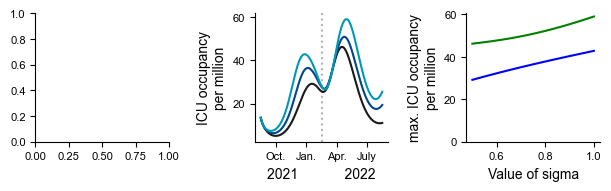

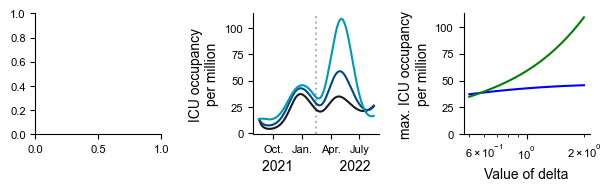

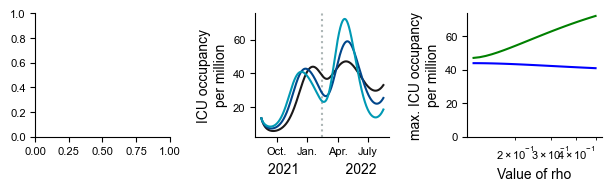

In [55]:
myplot(**beta_sa, type='log')
myplot(**kappa_sa)
myplot(**sigma_sa)
myplot(**delta_sa, type='log')
myplot(**rho_sa, type='log')

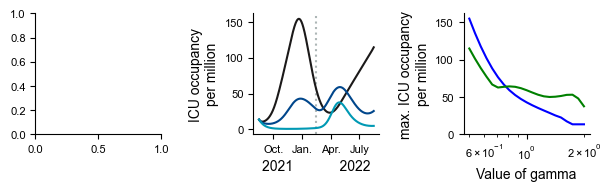

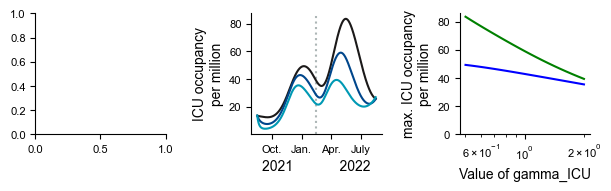

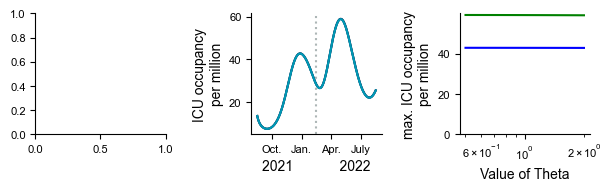

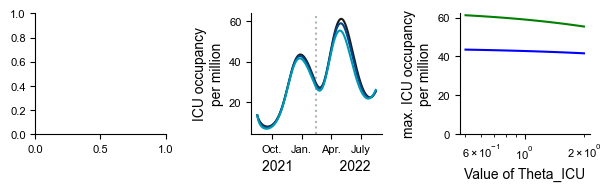

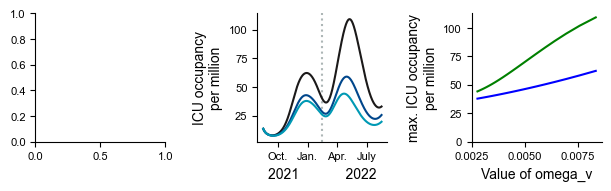

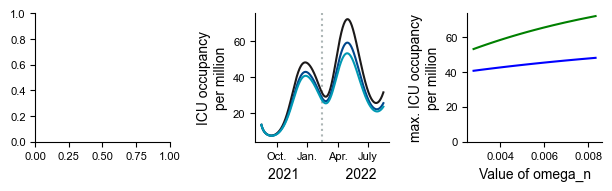

In [56]:
myplot(**gamma_sa, type='log')
myplot(**gammaICU_sa, type='log')
myplot(**Theta_sa, type='log')
myplot(**ThetaICU_sa, type='log')
myplot(**omegav_sa)
myplot(**omegan_sa)

### Seasonality

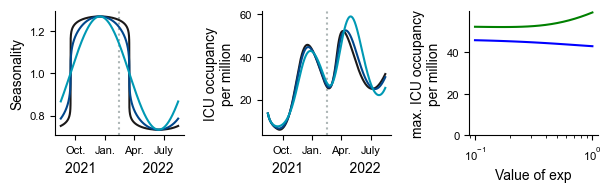

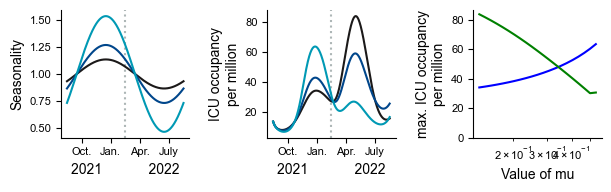

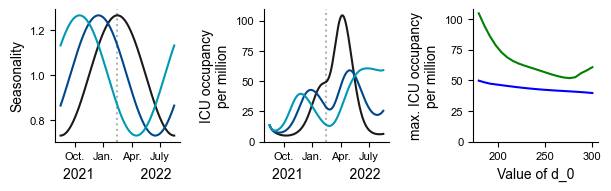

In [57]:
myplot(**exp_sa, type='log', plot1='seasonality')
myplot(**mu_sa, type='log', plot1='seasonality')
myplot(**d0_sa, plot1='seasonality')

### Kernels

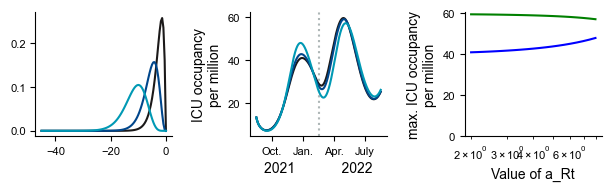

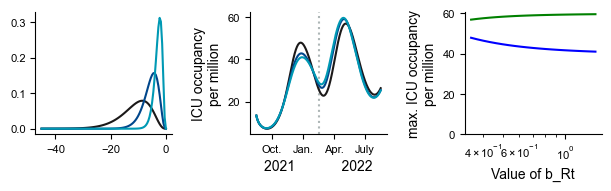

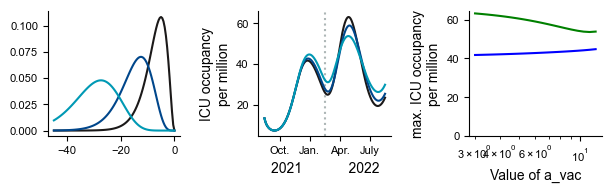

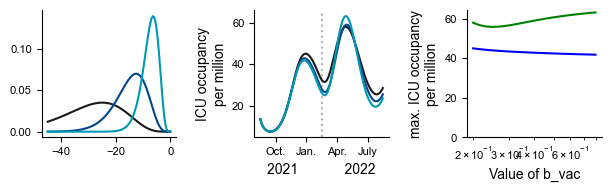

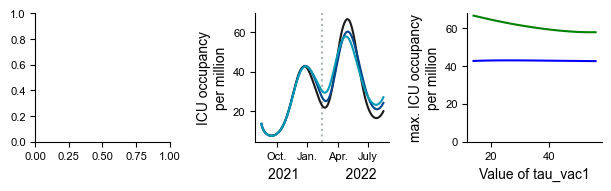

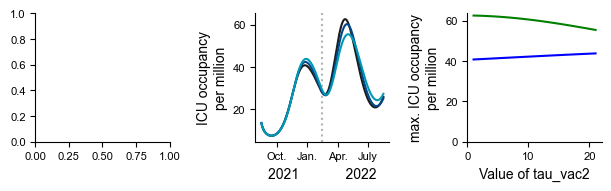

In [58]:
myplot(**aRt_sa, type='log', plot1='kernel_Rt')
myplot(**bRt_sa, type='log', plot1='kernel_Rt')
myplot(**avac_sa, type='log', plot1='kernel_vac')
myplot(**bvac_sa, type='log', plot1='kernel_vac')
myplot(**tauvac1_sa)
myplot(**tauvac2_sa)

### Contact feedback

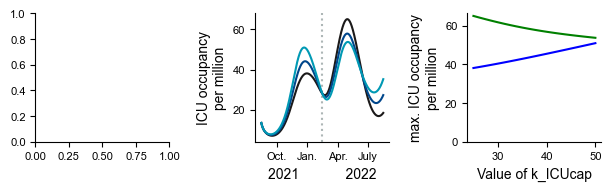

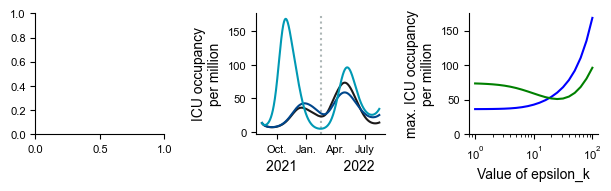

In [59]:
myplot(**kICUcap_sa)
myplot(**epsilonK_sa, type='log')

### Vaccination

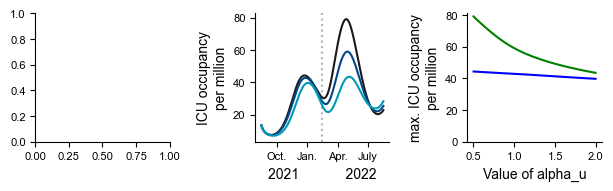

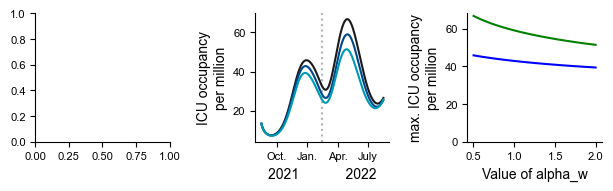

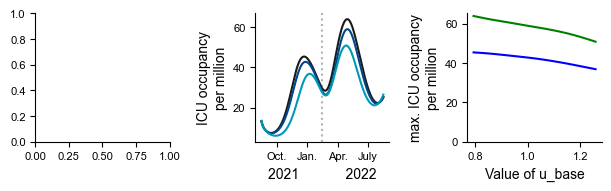

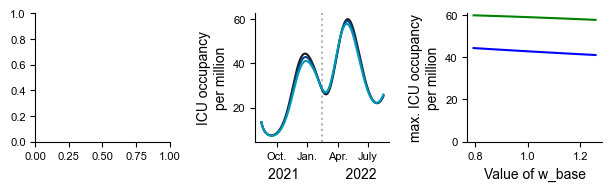

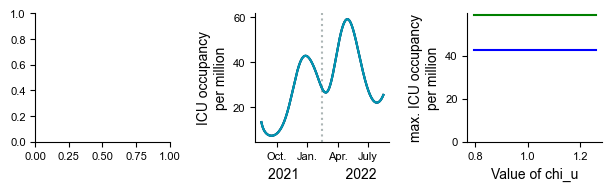

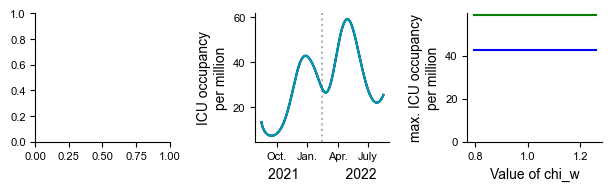

In [60]:
myplot(**alphaU_sa)
myplot(**alphaW_sa)
myplot(**ubase_sa)
myplot(**wbase_sa)
myplot(**chiU_sa)
myplot(**chiW_sa)

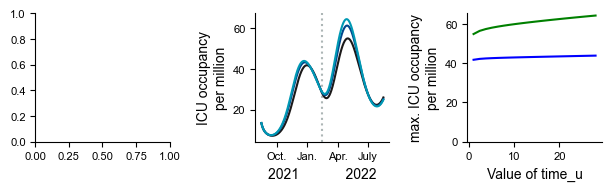

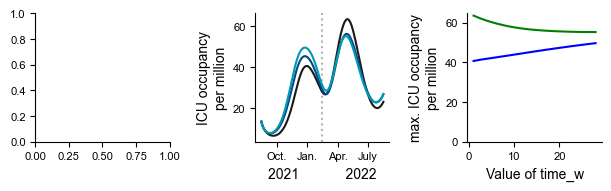

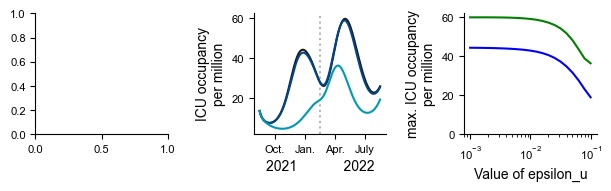

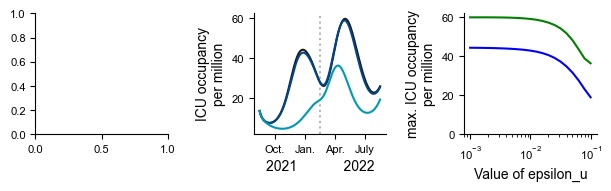

In [61]:
myplot(**timeU_sa)
myplot(**timeW_sa)
myplot(**epsilonU_sa, type='log')
myplot(**epsilonW_sa, type='log')

### Influx

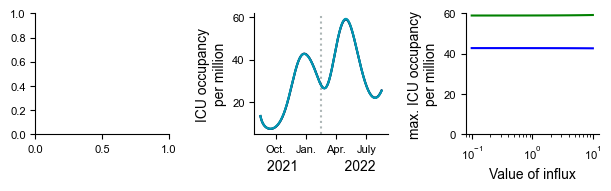

In [62]:
myplot(**influx_sa, type='log')

In [54]:
def myplot(models, icu_winter, icu_spring, param_values, param_name, type='normal', plot1=None):
    plotting_agegroups.set_rcParams(arial=True)
    m1 = models[0]
    m2 = models[len(models)//2]
    m3 = models[-1]
    colors = {'lightblue':'#0099B4FF', 'darkblue':'#00468BFF', 'black':'#1B1919FF',
              'line':'#ADB6B6FF'}
    t = m1.times

    fig = plt.figure(figsize=(6., 1.8), constrained_layout=True)
    grid = fig.add_gridspec(ncols=3, nrows=1, wspace=0.1)
    ax1 = fig.add_subplot(grid[0])
    ax2 = fig.add_subplot(grid[1])
    ax3 = fig.add_subplot(grid[2])

    ax2.plot(t, m1.chopped_data()[:,10:12,:].sum(axis=(1,2)), color=colors['black'])
    ax2.plot(t, m2.chopped_data()[:,10:12,:].sum(axis=(1,2)), color=colors['darkblue'])
    ax2.plot(t, m3.chopped_data()[:,10:12,:].sum(axis=(1,2)), color=colors['lightblue'])
    
    ax3.plot(param_values, icu_winter, color='blue')
    ax3.plot(param_values, icu_spring, color='green')
    
    ax3.set_ylim(0,None)
    if type=='log':
        ax3.set_xscale('log')
#        ax3.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#        ax3.xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())

    ax2.set_xticks([45, 135, 45+2*90, 45+3*90])
    ax2.set_xticklabels(['Oct.','Jan.','Apr.','July'])
    ax2.axvline(180, ls=':', color=colors['line'], zorder=0)
    ax2.set_xlabel('2021            2022')
    
    ax2.set_ylabel("ICU occupancy\nper million")
    ax3.set_ylabel("max. ICU occupancy\nper million")
    ax3.set_xlabel("Value of "+param_name)

    if plot1=='seasonality':
        ax1.plot(t, m1.Gamma(t), color=colors['black'])
        ax1.plot(t, m2.Gamma(t), color=colors['darkblue'])
        ax1.plot(t, m3.Gamma(t), color=colors['lightblue'])
        
        ax1.set_xticks([45, 135, 45+2*90, 45+3*90])
        ax1.set_xticklabels(['Oct.','Jan.','Apr.','July'])
        ax1.axvline(180, ls=':', color=colors['line'], zorder=0)
        ax1.set_xlabel('2021            2022')
        ax1.set_ylabel("Seasonality")
    
    if plot1=='kernel_Rt':
        def g_Rt(m,x):
            return m.b_Rt**m.a_Rt * x**(m.a_Rt-1) * np.exp(-m.b_Rt*x) / gamma_func(m.a_Rt)
        x = np.linspace(0,m1.gamma_cutoff,100)
        ax1.plot(-x, g_Rt(m1,x), color=colors['black'])
        ax1.plot(-x, g_Rt(m2,x), color=colors['darkblue'])
        ax1.plot(-x, g_Rt(m3,x), color=colors['lightblue'])

    if plot1=='kernel_vac':
        def g_vac(m,x):
            return m.b_vac**m.a_vac * x**(m.a_vac-1) * np.exp(-m.b_vac*x) / gamma_func(m.a_vac)
        x = np.linspace(0,m1.gamma_cutoff,100)
        ax1.plot(-x, g_vac(m1,x), color=colors['black'])
        ax1.plot(-x, g_vac(m2,x), color=colors['darkblue'])
        ax1.plot(-x, g_vac(m3,x), color=colors['lightblue'])
    
    
    plt.show()

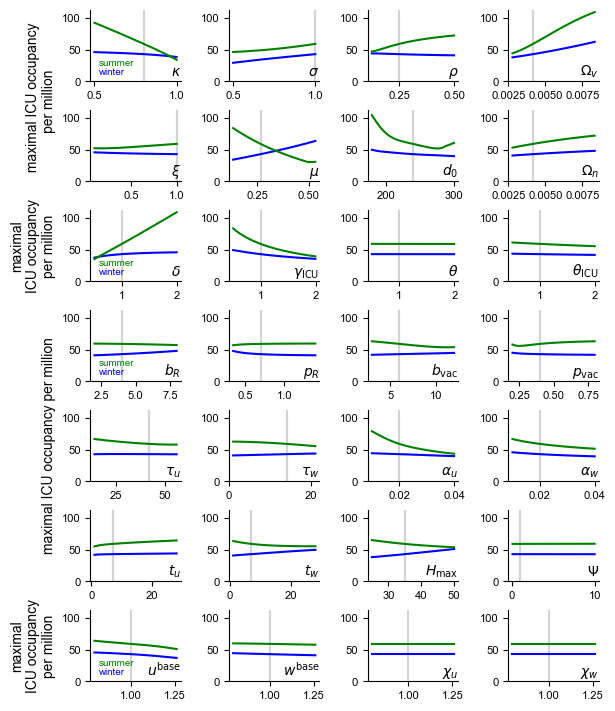

In [78]:
plotting_agegroups.set_rcParams(arial=True)
colors = {'lightblue':'#0099B4FF', 'darkblue':'#00468BFF', 'black':'#1B1919FF',
          'line':'#ADB6B6FF'}

fig = plt.figure(figsize=(6., 7.), constrained_layout=True)
grid = fig.add_gridspec(ncols=4, nrows=7, wspace=0.1)

axs = [0]*28
axs[0] = fig.add_subplot(grid[0])
for i in range(1,28):
    axs[i] = fig.add_subplot(grid[i], sharey=axs[0])

data = [SA['kappa'],SA['sigma'],SA['rho'],SA['omegav'],
        SA['exp'],SA['mu'],SA['d0'],SA['omegan'],
        SA['delta'],SA['gammaICU'],SA['Theta'],SA['ThetaICU'],
        SA['aRt'],SA['bRt'],SA['avac'],SA['bvac'],
        SA['tauvac1'],SA['tauvac2'],SA['alphaU'],SA['alphaW'],
        SA['timeU'],SA['timeW'],SA['kICUcap'],SA['influx'],
        SA['ubase'],SA['wbase'],SA['chiU'],SA['chiW'],
       ]
names = [r'$\kappa$',r'$\sigma$',r'$\rho$',r'$\Omega_v$',
         r'$\xi$',r'$\mu$',r'$d_0$',r'$\Omega_n$',
         r'$\delta$',r'$\gamma_\mathrm{ICU}$',r'$\theta$',r'$\theta_\mathrm{ICU}$',
         r'$b_{R}$',r'$p_{R}$',r'$b_\mathrm{vac}$',r'$p_\mathrm{vac}$',
         r'$\tau_u$',r'$\tau_w$',r'$\alpha_u$',r'$\alpha_w$',
         r'$t_u$',r'$t_w$',r'$H_\mathrm{max}$',r'$\Psi$',
         r'$u^\mathrm{base}$',r'$w^\mathrm{base}$',r'$\chi_u$',r'$\chi_w$',
        ]

for ax,sa,n in zip(axs, data, names):
    ax.plot(sa['param_values'], sa['icu_winter'], color='blue')
    ax.plot(sa['param_values'], sa['icu_spring'], color='green')
    ax.text(1.0,0.08,n, ha='right', size=10, transform=ax.transAxes)
#    ax.set_xlabel(n)

axs[0].set_ylim(0,None)

for i in list(range(0,8))+list(range(12,24)):
    axs[i].axvline(getattr(SA['m'], data[i]['param_name']), color='lightgray', zorder=0)

for i in list(range(8,12))+list(range(24,28)):
    axs[i].axvline(1., color='lightgray', zorder=0)

axs[4].set_ylabel("                         maximal ICU occupancy\n                       per million")
axs[8].set_ylabel("maximal\nICU occupancy\nper million")
axs[16].set_ylabel("maximal ICU occupancy per million")
axs[24].set_ylabel("maximal\nICU occupancy\nper million")

for i in list(range(0,8))+list(range(12,24)):
    axs[i].axvline(getattr(SA['m'], data[i]['param_name']), color='lightgray', zorder=0)

for ax in [axs[0], axs[8], axs[12], axs[24]]:
    ax.text(0.09,0.22, 'summer', ha='left', color='green', size=7, transform=ax.transAxes)
    ax.text(0.1,0.1, 'winter', ha='left', color='blue', size=7, transform=ax.transAxes)

fig.align_ylabels()

fig.savefig('./figures/extended/sensitivity.pdf')
plt.show()

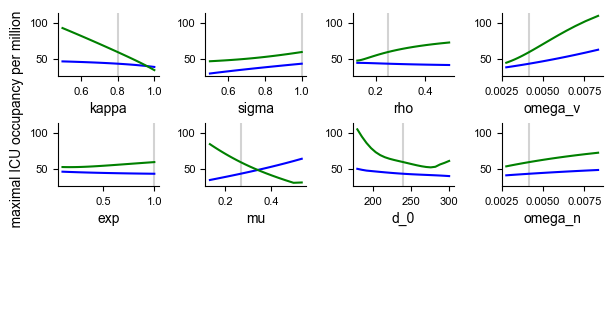

In [77]:
plotting_agegroups.set_rcParams(arial=True)
fig = plt.figure(figsize=(6., 2.2), constrained_layout=True)
grid = fig.add_gridspec(ncols=4, nrows=2, wspace=0.1)

axs = [0]*8
axs[0] = fig.add_subplot(grid[0])
for i in range(1,8):
    axs[i] = fig.add_subplot(grid[i], sharey=axs[0])

data = [SA['kappa'],SA['sigma'],SA['rho'],SA['omegav'],
        SA['exp'],SA['mu'],SA['d0'],SA['omegan'],
       ]

for ax,sa in zip(axs, data):
    ax.plot(sa['param_values'], sa['icu_winter'], color='blue')
    ax.plot(sa['param_values'], sa['icu_spring'], color='green')
    ax.set_xlabel(sa['param_name'])
    ax.axvline(getattr(SA['m'], sa['param_name']), color='lightgray', zorder=0)

axs[4].set_ylabel("                   maximal ICU occupancy per million")

fig.savefig('./figures/extended/sensitivity1.pdf')
plt.show()

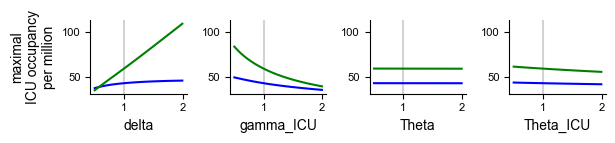

In [158]:
plotting_agegroups.set_rcParams(arial=True)
fig = plt.figure(figsize=(6., 1.2), constrained_layout=True)
grid = fig.add_gridspec(ncols=4, nrows=1, wspace=0.1)

axs = [0]*4
axs[0] = fig.add_subplot(grid[0])
for i in range(1,4):
    axs[i] = fig.add_subplot(grid[i], sharey=axs[0])

data = [SA['delta'],SA['gammaICU'],SA['Theta'],SA['ThetaICU']]

for ax,sa in zip(axs, data):
    ax.plot(sa['param_values'], sa['icu_winter'], color='blue')
    ax.plot(sa['param_values'], sa['icu_spring'], color='green')
    ax.set_xlabel(sa['param_name'])
    ax.axvline(1, color='lightgray', zorder=0)


axs[0].set_ylabel("maximal\nICU occupancy\nper million")

fig.savefig('./figures/extended/sensitivity2.pdf')
plt.show()

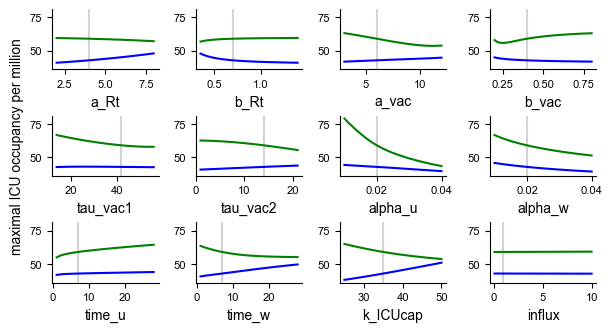

In [159]:
plotting_agegroups.set_rcParams(arial=True)
fig = plt.figure(figsize=(6., 3.2), constrained_layout=True)
grid = fig.add_gridspec(ncols=4, nrows=3, wspace=0.1)

axs = [0]*12
axs[0] = fig.add_subplot(grid[0])
for i in range(1,12):
    axs[i] = fig.add_subplot(grid[i], sharey=axs[0])

data = [SA['aRt'],SA['bRt'],SA['avac'],SA['bvac'],
        SA['tauvac1'],SA['tauvac2'],SA['alphaU'],SA['alphaW'],
        SA['timeU'],SA['timeW'],SA['kICUcap'],SA['influx'],
       ]

for ax,sa in zip(axs, data):
    ax.plot(sa['param_values'], sa['icu_winter'], color='blue')
    ax.plot(sa['param_values'], sa['icu_spring'], color='green')
    ax.set_xlabel(sa['param_name'])
    ax.axvline(getattr(SA['m'], sa['param_name']), color='lightgray', zorder=0)

axs[4].set_ylabel("maximal ICU occupancy per million")

fig.savefig('./figures/extended/sensitivity3.pdf')
plt.show()

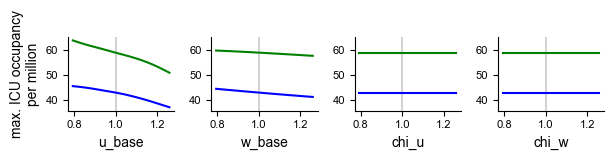

In [160]:
plotting_agegroups.set_rcParams(arial=True)
fig = plt.figure(figsize=(6., 1.2), constrained_layout=True)
grid = fig.add_gridspec(ncols=4, nrows=1, wspace=0.1)

axs = [0]*4
axs[0] = fig.add_subplot(grid[0])
for i in range(1,4):
    axs[i] = fig.add_subplot(grid[i], sharey=axs[0])

data = [SA['ubase'],SA['wbase'],SA['chiU'],SA['chiW']]

for ax,sa in zip(axs, data):
    ax.plot(sa['param_values'], sa['icu_winter'], color='blue')
    ax.plot(sa['param_values'], sa['icu_spring'], color='green')
    ax.set_xlabel(sa['param_name'])
    ax.axvline(1, color='lightgray', zorder=0)


axs[0].set_ylabel("max. ICU occupancy\nper million")

fig.savefig('./figures/extended/sensitivity4.pdf')
plt.show()